# Name : Dasari Narsingarao
# Domain : Data Science Intern
# Organization : LetsGrowMore-VIP
# Task 4: Prediction using decision Tree Algorithm. 
# Intermediate  Level Task
# Linkedin Profile : https://www.linkedin.com/in/narsingarao-dasari-966477152/

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

## Loading the data

In [2]:
iris_data=pd.read_csv('D:\Internships\LetsGrowMore\Task-4\Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Data Preprocessing

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_data.shape

(150, 6)

In [8]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_data.drop('Id',axis = 1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizing iris data

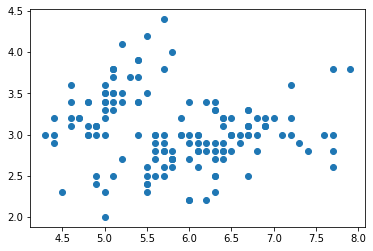

In [12]:
plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'])
plt.show()

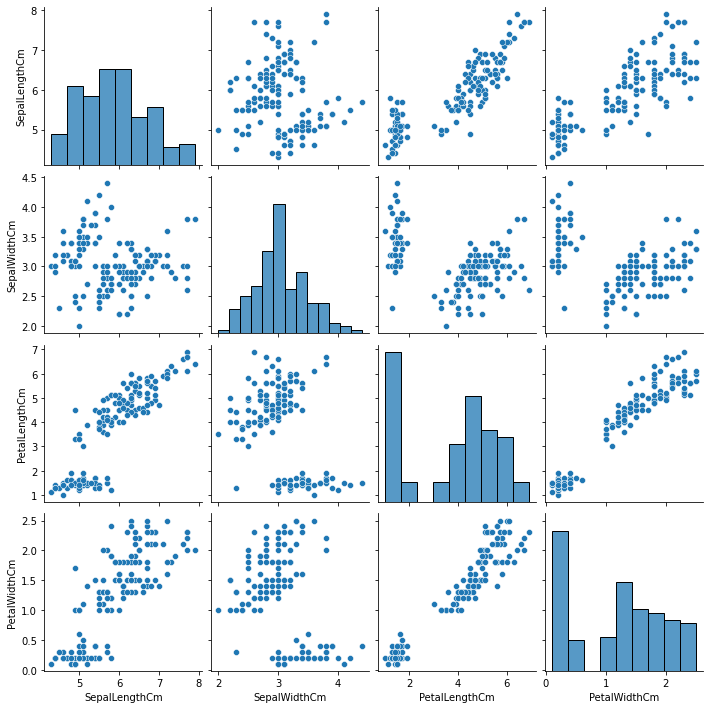

In [13]:
sns.pairplot(iris_data)
plt.show()

In [14]:
target = iris_data['Species']
df = iris_data.copy()
df = df.drop('Species', axis=1)
X = iris_data.iloc[:, [0,1,2,3]].values

#Using LabelEncoder is used to convert categorical value into numeric value
from sklearn.preprocessing import LabelEncoder

label =LabelEncoder()
iris_data['Species'] =label.fit_transform(iris_data['Species'])
y =iris_data['Species'].values
iris_data.shape

(150, 5)

# Model Preparation

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Defining the Decision Tree Algorithm
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

## Classification Report

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf_tree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

## Graphical Representation of Decision Tree

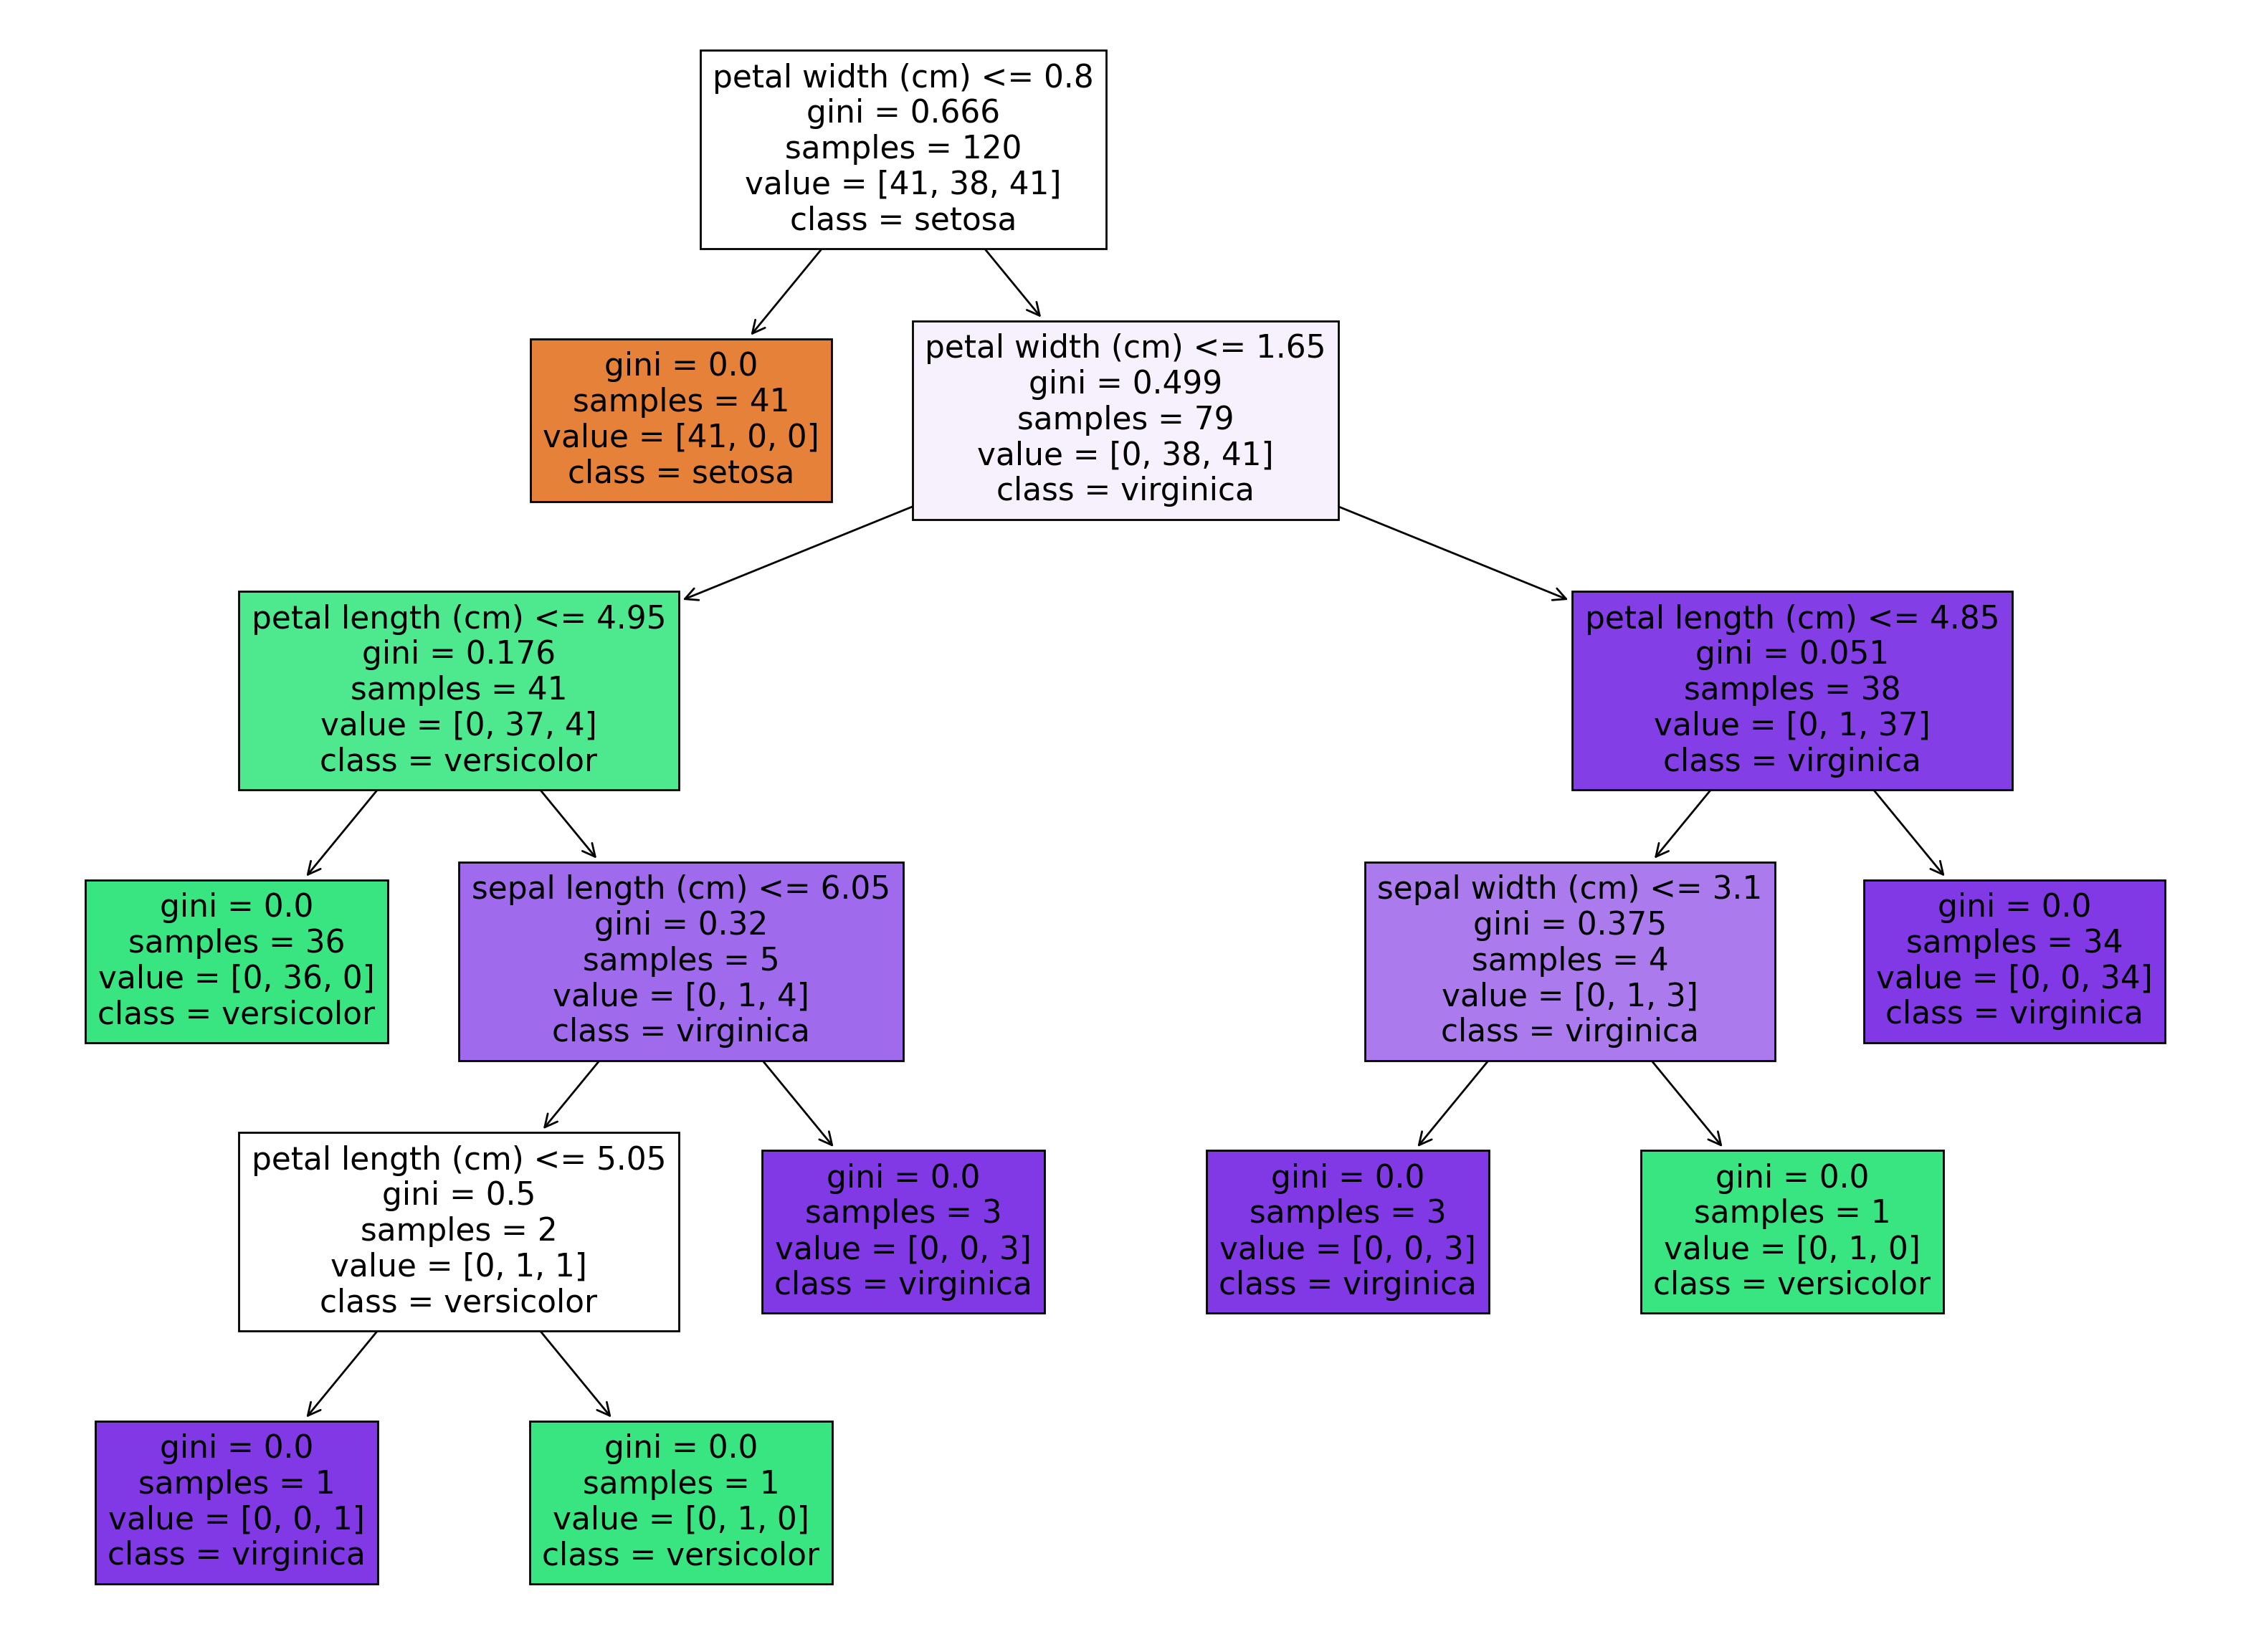

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree 

a = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b = ['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows =1, ncols=1, figsize=(20,15), dpi=200)

tree.plot_tree(clf_tree, feature_names=a, class_names=b, filled= True);

[Text(558.0, 996.6, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(418.5, 815.4000000000001, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(697.5, 815.4000000000001, 'X[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(279.0, 634.2, 'X[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(139.5, 453.0, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(418.5, 453.0, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(279.0, 271.79999999999995, 'X[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(139.5, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(558.0, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1116.0, 634.2, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(976.5, 453.0, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]')

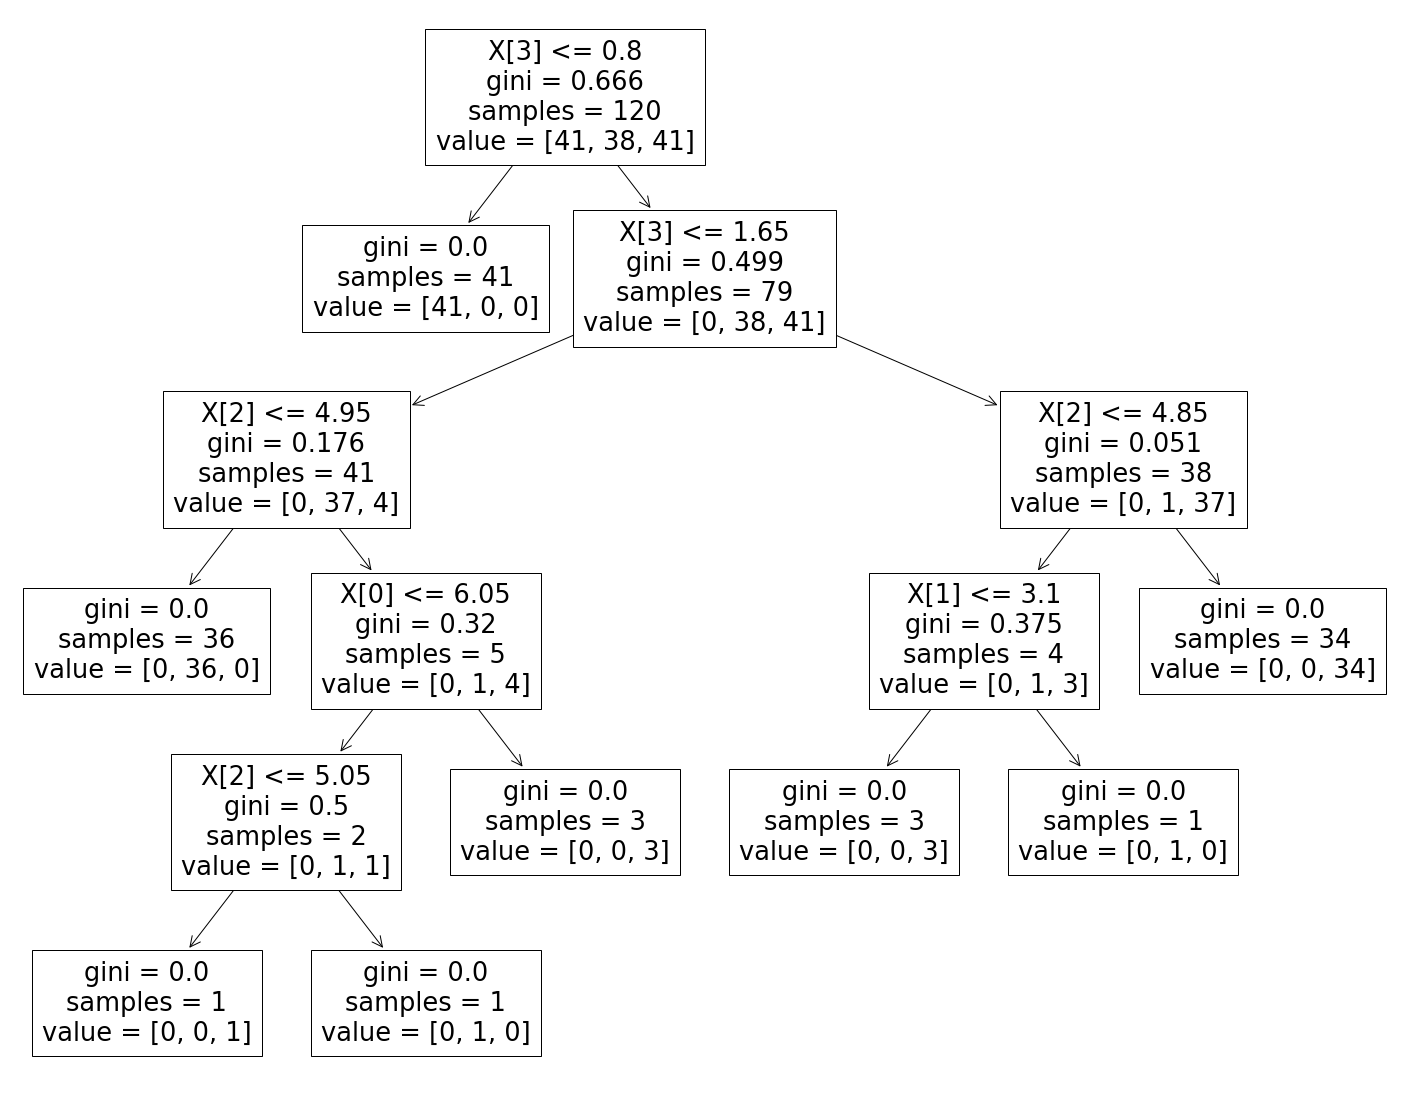

In [20]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_tree)

## Thank you!